<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [4]:
!pip install pandas
!pip install matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




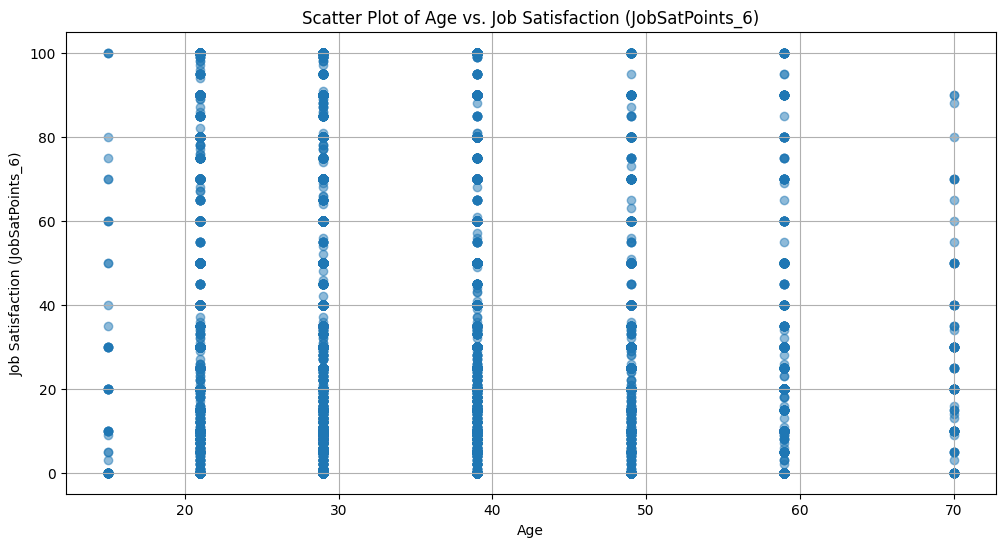

In [6]:
## Write your code here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select age and job satisfaction data from the 'main' table
QUERY = """
SELECT Age, JobSatPoints_6 
FROM main 
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in Age_numeric
df = df.dropna(subset=['Age_numeric'])

# Create a scatter plot for Age vs. Job Satisfaction (JobSatPoints_6)
plt.figure(figsize=(12, 6))
plt.scatter(df['Age_numeric'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


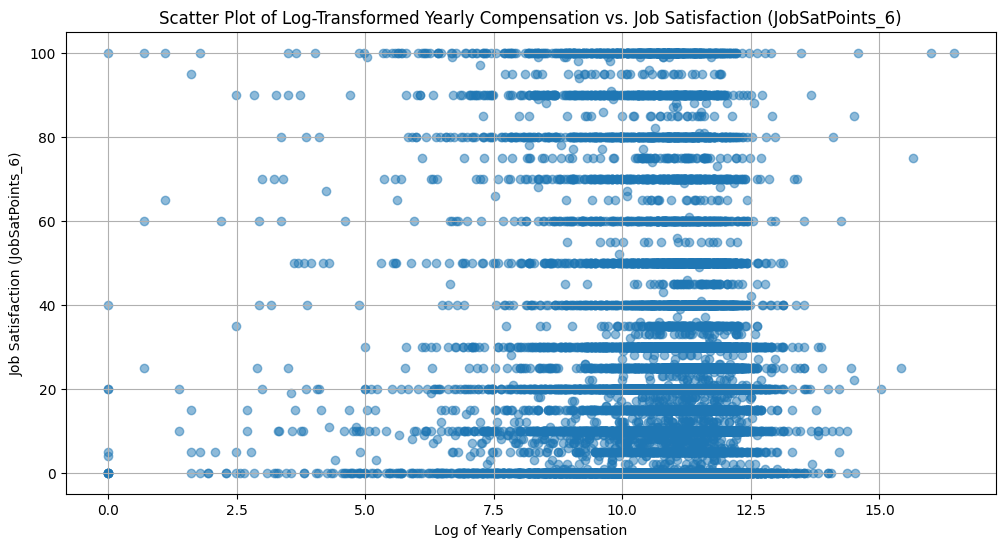

In [9]:
## Write your code here

!pip install numpy
import numpy as np

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select yearly compensation and job satisfaction data from the 'main' table
QUERY = """
SELECT ConvertedCompYearly, JobSatPoints_6 
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Handle skewness by applying log transformation to yearly compensation data
df['Log_ConvertedCompYearly'] = np.log(df['ConvertedCompYearly'])

# Create a scatter plot for log-transformed yearly compensation vs. job satisfaction (JobSatPoints_6)
plt.figure(figsize=(12, 6))
plt.scatter(df['Log_ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Log-Transformed Yearly Compensation vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Log of Yearly Compensation')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


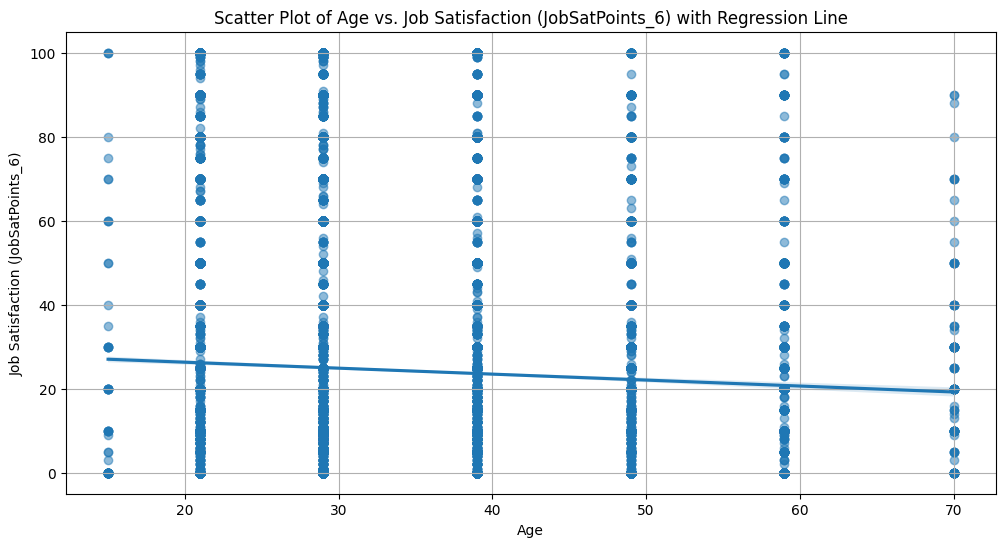

In [11]:
## Write your code here

!pip install seaborn
import seaborn as sns
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select age and job satisfaction data from the 'main' table
QUERY = """
SELECT Age, JobSatPoints_6 
FROM main 
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in Age_numeric
df = df.dropna(subset=['Age_numeric'])

# Create a scatter plot for Age vs. Job Satisfaction (JobSatPoints_6) with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Age_numeric', y='JobSatPoints_6', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Age vs. Job Satisfaction (JobSatPoints_6) with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


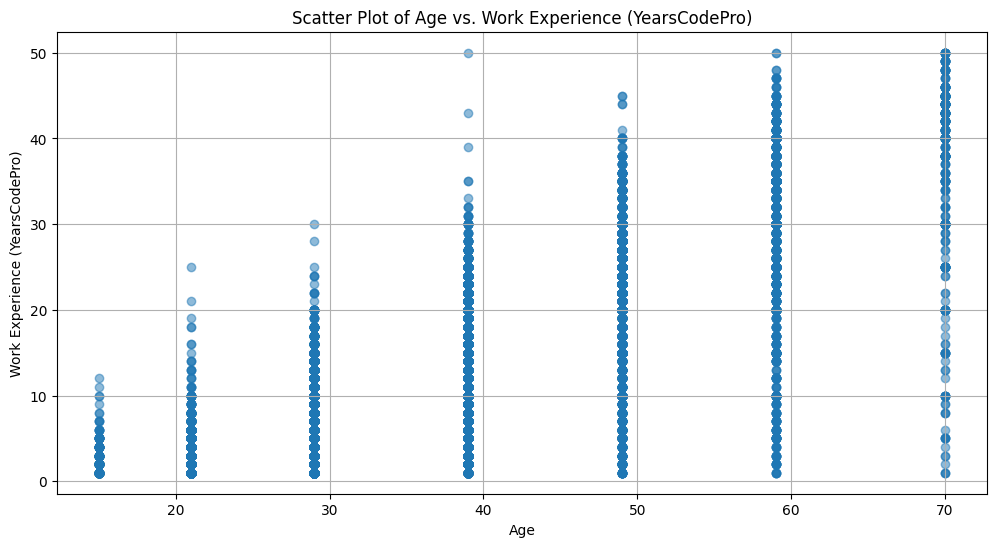

In [12]:
## Write your code here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select age and work experience data from the 'main' table
QUERY = """
SELECT Age, YearsCodePro 
FROM main 
WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in Age_numeric
df = df.dropna(subset=['Age_numeric'])

# Convert YearsCodePro to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with None values in YearsCodePro
df = df.dropna(subset=['YearsCodePro'])

# Create a scatter plot for Age vs. Work Experience (YearsCodePro)
plt.figure(figsize=(12, 6))
plt.scatter(df['Age_numeric'], df['YearsCodePro'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [ ]:
## Write your code here

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
## Write your code here

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


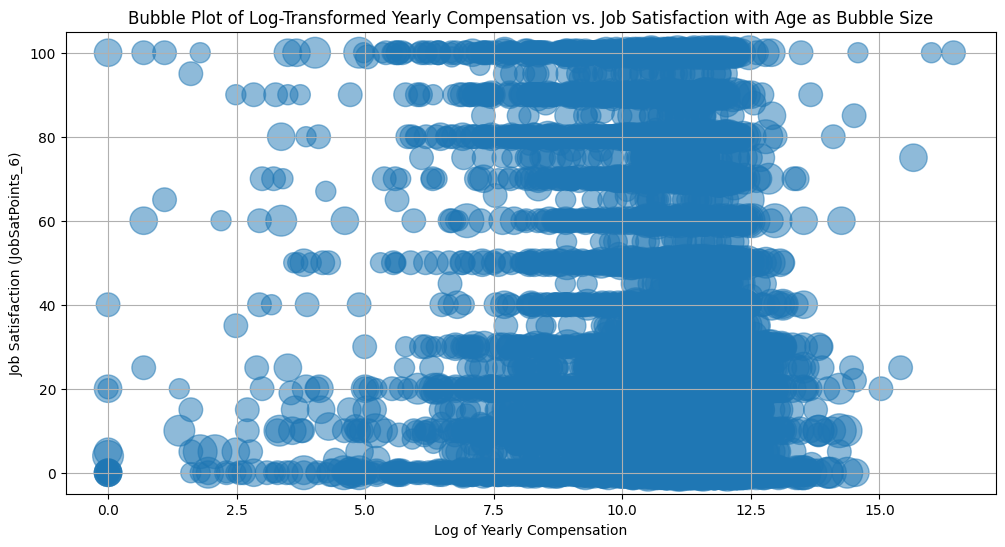

In [13]:
## Write your code here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select yearly compensation, job satisfaction, and age data from the 'main' table
QUERY = """
SELECT ConvertedCompYearly, JobSatPoints_6, Age 
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in Age_numeric
df = df.dropna(subset=['Age_numeric'])

# Handle skewness by applying log transformation to yearly compensation data
df['Log_ConvertedCompYearly'] = np.log(df['ConvertedCompYearly'])

# Create a bubble plot for log-transformed yearly compensation vs. job satisfaction with age as bubble size
plt.figure(figsize=(12, 6))
plt.scatter(df['Log_ConvertedCompYearly'], df['JobSatPoints_6'], s=df['Age_numeric']*10, alpha=0.5)
plt.title('Bubble Plot of Log-Transformed Yearly Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Log of Yearly Compensation')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


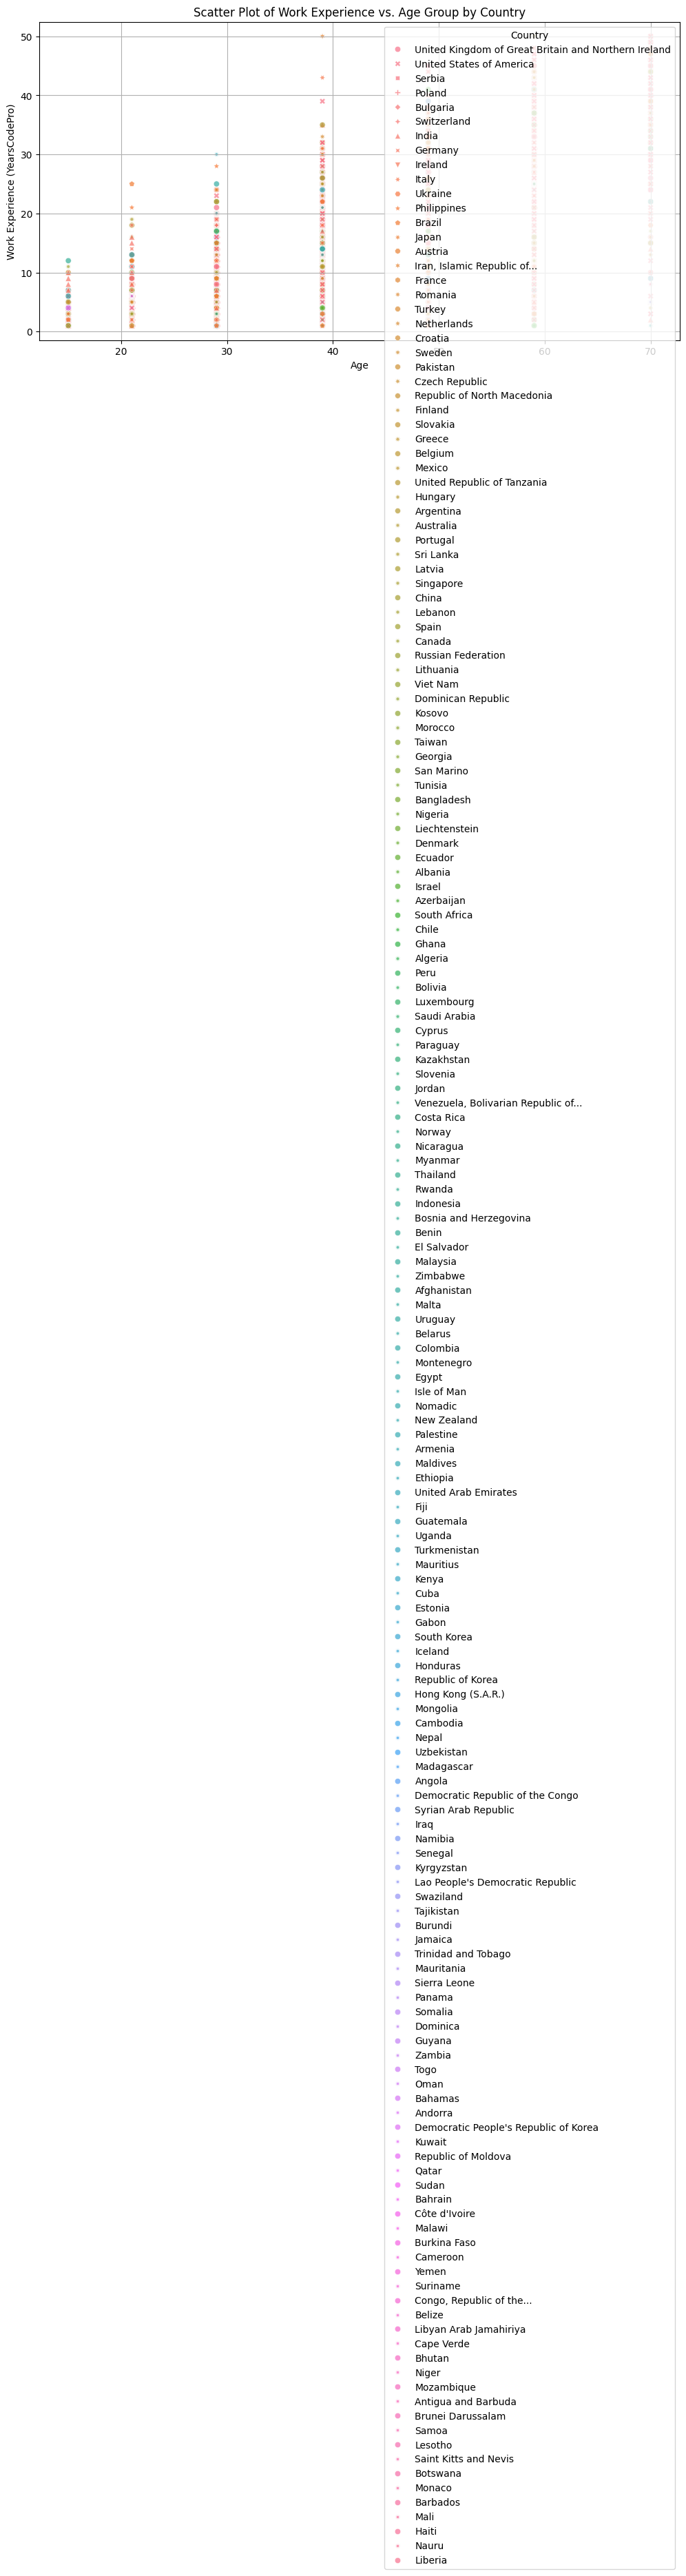

In [14]:
## Write your code here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select work experience, age, and country data from the 'main' table
QUERY = """
SELECT YearsCodePro, Age, Country 
FROM main 
WHERE YearsCodePro IS NOT NULL AND Age IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in Age_numeric
df = df.dropna(subset=['Age_numeric'])

# Convert YearsCodePro to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with None values in YearsCodePro
df = df.dropna(subset=['YearsCodePro'])

# Create a scatter plot for Work Experience vs. Age Group by Country
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age_numeric', y='YearsCodePro', hue='Country', style='Country', data=df, alpha=0.7)
plt.title('Scatter Plot of Work Experience vs. Age Group by Country')
plt.xlabel('Age')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
